In [2]:
import numpy as np
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
from numpy import mean
from numpy import std
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from BaselineRemoval import BaselineRemoval
from sklearn.model_selection import KFold, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directoryimport matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!ls

AGEs.csv
SpecAnalysis
Untitled.ipynb
add_label.py
ages.ipynb
ann.ipynb
exp_variance
imodpoly_raman_spectroscopy
lda_kernel.ipynb
logs
matlab_2
matlab_raman_preprocessed
matlab_raman_preprocessed copy
matlab_raman_preprocessed copy.zip
original_raman_spectroscopy
papers
pca_confusion_matrix.pdf
pca_kernel.ipynb
pca_svm.ipynb
plolyfit_ann-jvsc-7aedbb54-b08c-4e56-b67b-12dd5e91cff2.ipynb
plolyfit_ann.ipynb
plot
plot1.png
plot2_1.pdf
polyfit_old.ipynb
raman-spectroscopy-project.ipynb
scaling.py
testing
transform.py
visualize.ipynb


In [4]:
earData = pd.read_csv('matlab_2/earData.csv', header=None)

In [5]:
earData

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,1000
0,0.000472,0.000763,0.000748,0.000763,0.000688,0.000681,0.000793,0.000914,0.001016,0.001111,...,0.000650,0.000604,0.000556,0.000576,0.000621,0.000655,0.000639,0.000591,0.000577,0.000562
1,0.000594,0.000940,0.001164,0.001255,0.001188,0.001105,0.001019,0.000900,0.000833,0.000818,...,0.000595,0.000520,0.000490,0.000517,0.000571,0.000635,0.000663,0.000663,0.000602,0.000574
2,0.000585,0.000711,0.000887,0.000924,0.000868,0.000812,0.000743,0.000651,0.000622,0.000655,...,0.000810,0.000717,0.000522,0.000415,0.000422,0.000554,0.000615,0.000627,0.000654,0.000354
3,0.000473,0.001088,0.001487,0.001697,0.001667,0.001614,0.001561,0.001435,0.001349,0.001335,...,0.000556,0.000576,0.000575,0.000638,0.000685,0.000673,0.000709,0.000772,0.000724,0.000791
4,0.000976,0.000756,0.000945,0.000942,0.000941,0.000932,0.000836,0.000687,0.000597,0.000599,...,0.001024,0.000985,0.000796,0.000832,0.000919,0.000942,0.000909,0.000866,0.000731,0.000661
5,0.000883,0.000659,0.000618,0.000615,0.000713,0.000778,0.000781,0.000788,0.000777,0.000739,...,0.000854,0.000824,0.000798,0.000854,0.000914,0.000932,0.000948,0.000949,0.000851,0.000803
6,0.000521,0.000793,0.001192,0.001331,0.001310,0.001285,0.001222,0.001093,0.001053,0.001064,...,0.000343,0.000350,0.000371,0.000375,0.000435,0.000589,0.000646,0.000653,0.000712,0.000484
7,0.000475,0.000839,0.000966,0.000994,0.000849,0.000710,0.000610,0.000519,0.000504,0.000567,...,0.000303,0.000257,0.000289,0.000308,0.000320,0.000337,0.000375,0.000410,0.000425,0.000568
8,0.000447,0.000722,0.000903,0.001001,0.000997,0.001002,0.001028,0.001016,0.001008,0.001009,...,0.000600,0.000601,0.000604,0.000551,0.000535,0.000612,0.000650,0.000669,0.000740,0.000642
9,0.000469,0.000843,0.001061,0.001132,0.001024,0.000932,0.000873,0.000794,0.000785,0.000841,...,0.000536,0.000418,0.000304,0.000246,0.000264,0.000373,0.000447,0.000486,0.000509,0.000364


In [6]:
earData = earData.to_numpy()

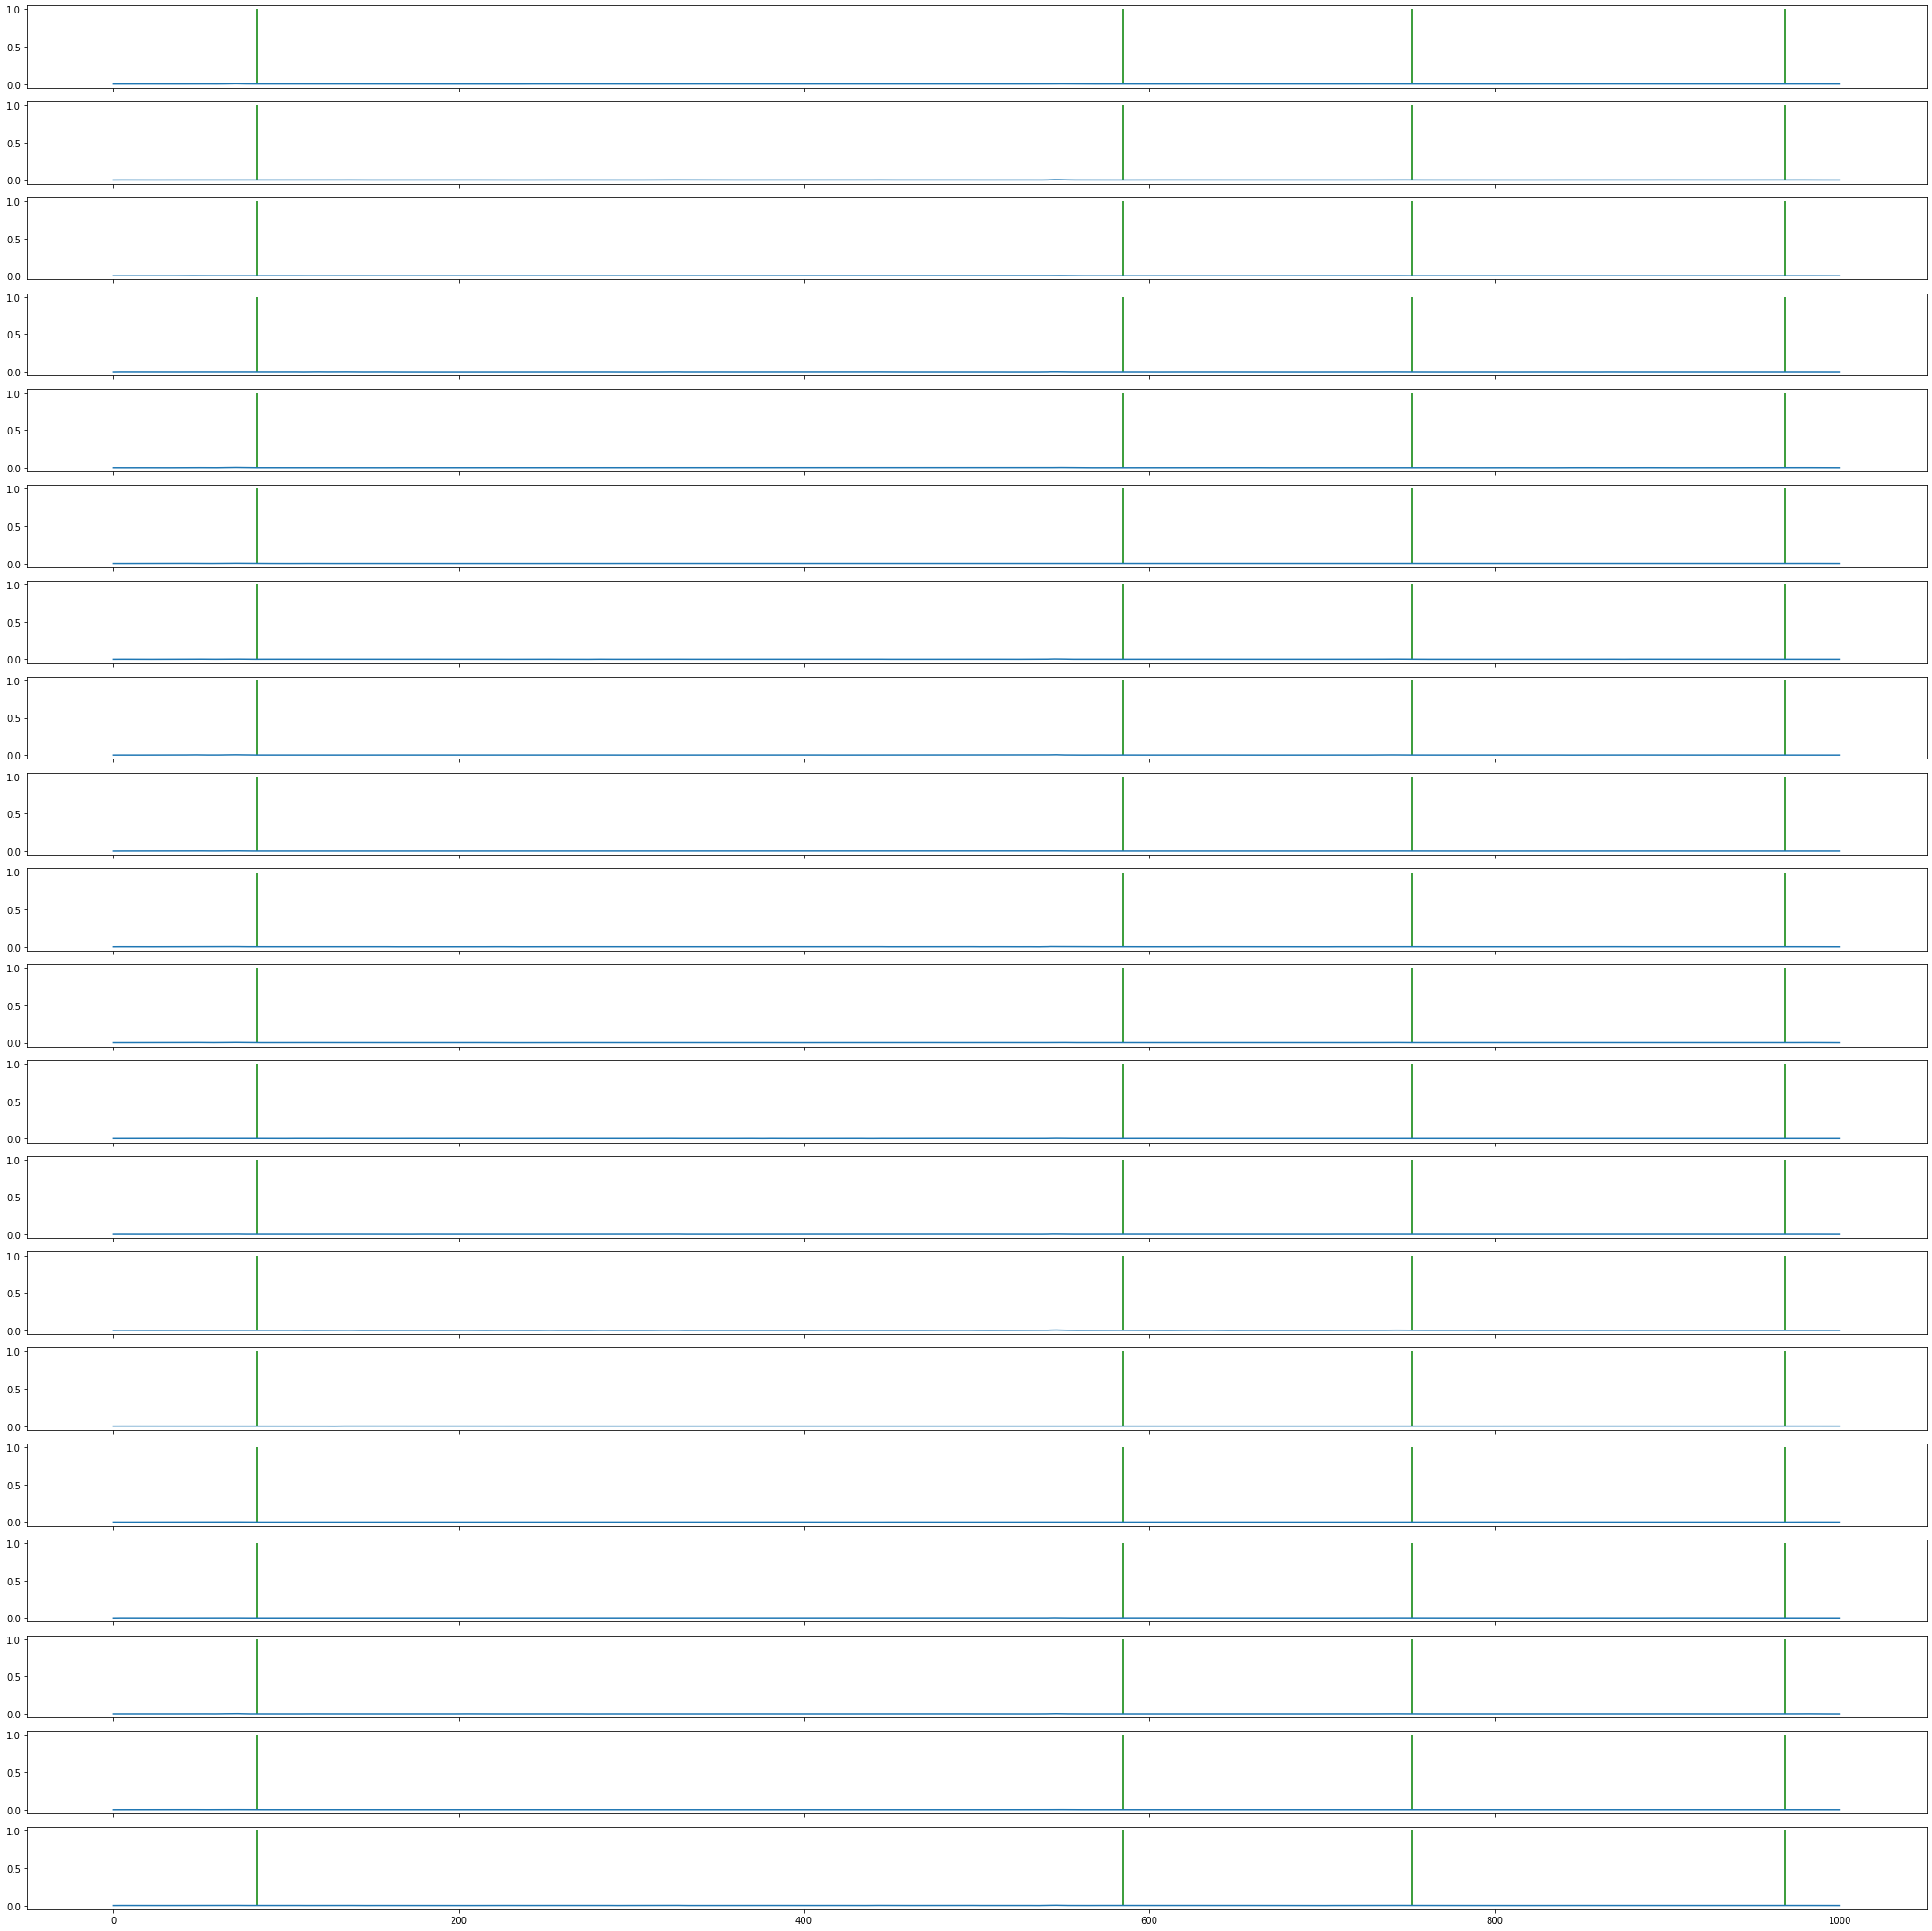

In [7]:
ax = []
fig, (ax) = plt.subplots(20, 1, sharex='col', figsize=(30,30))

# fig.figure(figsize=(15,3))

for idx, val in enumerate(earData):
    # fig.figure(figsize=(15,3))
    ax[idx].vlines(83, 0, 1, linestyles ="solid", colors ="green")
    ax[idx].vlines(585, 0, 1, linestyles ="solid", colors ="green")
    ax[idx].vlines(752, 0, 1, linestyles ="solid", colors ="green")
    ax[idx].vlines(968, 0, 1, linestyles ="solid", colors ="green")
    ax[idx].plot(val)
    
plt.show()

In [8]:
from sklearn.decomposition import PCA
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import roc_curve, plot_confusion_matrix, RocCurveDisplay

In [9]:
pca = PCA(n_components=2)

In [10]:
pca.fit(earData)

PCA(n_components=2)

In [11]:
X_pca = pca.fit_transform(earData)

In [12]:
X_pca

array([[ 0.00507213,  0.0038001 ],
       [-0.00471134,  0.00016913],
       [-0.00076263,  0.00115092],
       [-0.00627669, -0.00392981],
       [ 0.00666114,  0.00578602],
       [ 0.01139158, -0.00084824],
       [-0.00380683,  0.00265854],
       [-0.00327495,  0.00620224],
       [-0.00061808,  0.00102193],
       [-0.00545442, -0.00085233],
       [ 0.0045333 ,  0.00254062],
       [-0.00011025, -0.00212593],
       [-0.00308144, -0.0025205 ],
       [-0.00848018,  0.0013541 ],
       [ 0.00181898, -0.00546786],
       [ 0.01291472, -0.00408325],
       [-0.00337563, -0.00443751],
       [-0.0014818 ,  0.00579206],
       [ 0.00299931, -0.00302685],
       [-0.00395691, -0.0031834 ]])

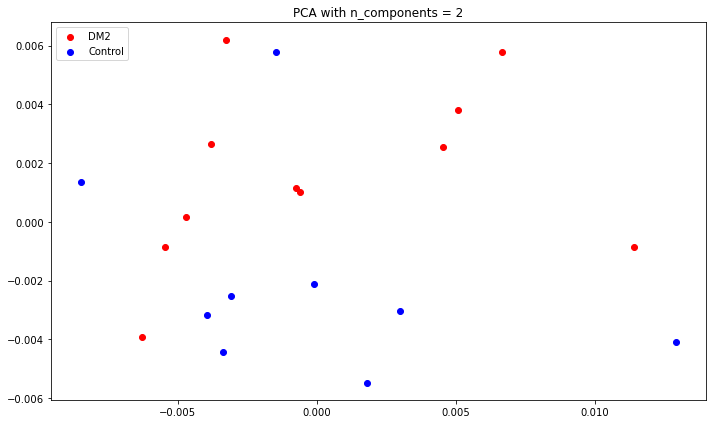

In [13]:
plt.figure(figsize=(10, 6))
#DM2
plt.scatter(X_pca[:, 0][:11], X_pca[:, 1][:11], c='red')
#Control
plt.scatter(X_pca[:, 0][11:], X_pca[:, 1][11:], c='blue')
plt.legend(['DM2', 'Control'], loc="upper left")
plt.title('PCA with n_components = 2')
# plt.savefig('plot/pca_2.pdf', bbox_inches='tight')
plt.show()

In [16]:
target = pd.read_csv('matlab_raman_preprocessed copy/veinData.csv')['has_DM2']
target

0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
Name: has_DM2, dtype: float64

In [17]:
from sklearn.model_selection import KFold, StratifiedKFold

In [18]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)

In [19]:
for train, test in kf.split(X_pca):
    print("%s %s" % (train, test))

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 18 19] [ 0 17]
[ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19] [ 1 15]
[ 0  1  2  3  4  6  7  9 10 11 12 13 14 15 16 17 18 19] [5 8]
[ 0  1  2  4  5  6  7  8  9 10 12 13 14 15 16 17 18 19] [ 3 11]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17 19] [16 18]
[ 0  1  3  4  5  6  7  8  9 10 11 12 14 15 16 17 18 19] [ 2 13]
[ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18] [ 9 19]
[ 0  1  2  3  5  6  7  8  9 10 11 13 14 15 16 17 18 19] [ 4 12]
[ 0  1  2  3  4  5  6  8  9 11 12 13 14 15 16 17 18 19] [ 7 10]
[ 0  1  2  3  4  5  7  8  9 10 11 12 13 15 16 17 18 19] [ 6 14]


In [20]:
scores = []
best_svc = SVC(kernel='linear', probability=True)
for train_index, test_index in kf.split(X_pca):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)

    X_train, X_test, y_train, y_test = X_pca[train_index], X_pca[test_index], target[train_index], target[test_index]
    best_svc.fit(X_train, y_train)
    scores.append(best_svc.score(X_test, y_test))

Train Index:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 18 19] 

Test Index:  [ 0 17]
Train Index:  [ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19] 

Test Index:  [ 1 15]
Train Index:  [ 0  1  2  3  4  6  7  9 10 11 12 13 14 15 16 17 18 19] 

Test Index:  [5 8]
Train Index:  [ 0  1  2  4  5  6  7  8  9 10 12 13 14 15 16 17 18 19] 

Test Index:  [ 3 11]
Train Index:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17 19] 

Test Index:  [16 18]
Train Index:  [ 0  1  3  4  5  6  7  8  9 10 11 12 14 15 16 17 18 19] 

Test Index:  [ 2 13]
Train Index:  [ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18] 

Test Index:  [ 9 19]
Train Index:  [ 0  1  2  3  5  6  7  8  9 10 11 13 14 15 16 17 18 19] 

Test Index:  [ 4 12]
Train Index:  [ 0  1  2  3  4  5  6  8  9 11 12 13 14 15 16 17 18 19] 

Test Index:  [ 7 10]
Train Index:  [ 0  1  2  3  4  5  7  8  9 10 11 12 13 15 16 17 18 19] 

Test Index:  [ 6 14]


In [21]:
scores

[0.5, 0.5, 0.5, 0.5, 0.0, 0.5, 0.5, 0.5, 1.0, 0.5]

In [22]:
best_svc.support_vectors_

array([[-0.00011025, -0.00212593],
       [-0.00308144, -0.0025205 ],
       [-0.00848018,  0.0013541 ],
       [ 0.01291472, -0.00408325],
       [-0.00337563, -0.00443751],
       [-0.0014818 ,  0.00579206],
       [ 0.00299931, -0.00302685],
       [-0.00395691, -0.0031834 ],
       [-0.00471134,  0.00016913],
       [-0.00076263,  0.00115092],
       [-0.00627669, -0.00392981],
       [ 0.01139158, -0.00084824],
       [-0.00327495,  0.00620224],
       [-0.00061808,  0.00102193],
       [-0.00545442, -0.00085233],
       [ 0.0045333 ,  0.00254062]])

In [23]:
roc_auc_score(target, best_svc.predict_proba(X_pca)[:, 1])

# roc_auc_score(target, best_svc.decision_function(X_pca))

0.20202020202020202

In [24]:
def calculate_auc():
    #define metrics
    y_pred_proba = log_regression.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    #create ROC curve
    plt.plot(fpr,tpr,label="AUC="+str(auc))
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend(loc=4)
    plt.show()

In [25]:
def flatten_np(array):    
    res = []
    for i in array:
        for j in i:
            res.append(j[1])

    return res

FOLD 1 True label
0     1.0
17    0.0
Name: has_DM2, dtype: float64


NameError: name 'ctrl_auc' is not defined

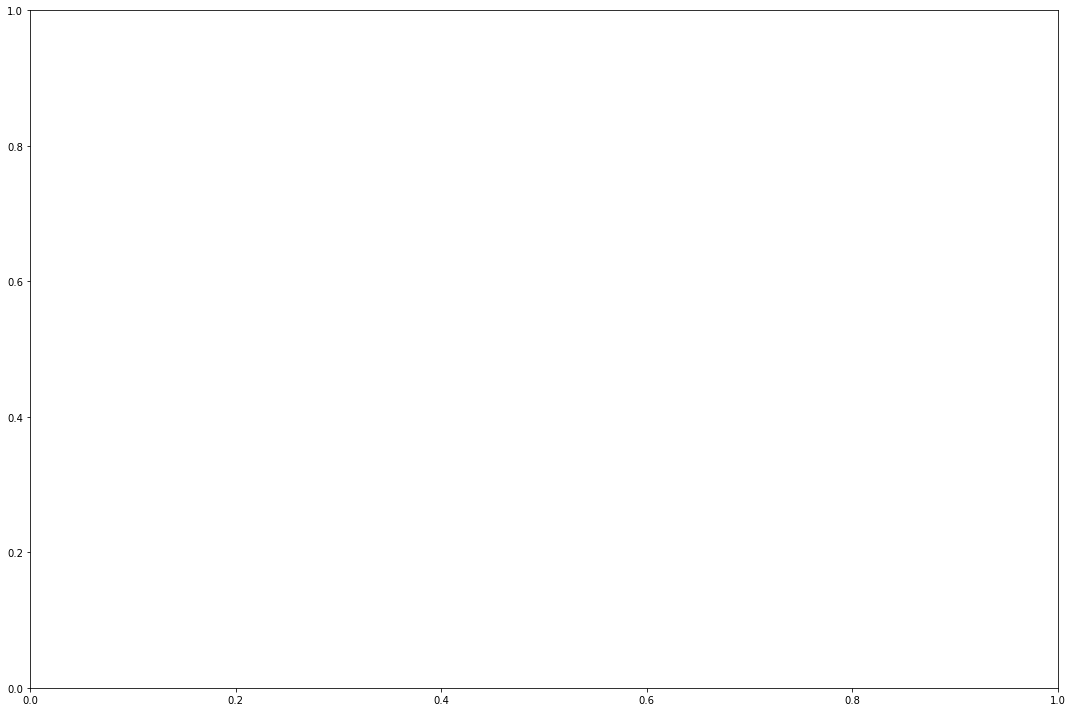

In [41]:
# Run classifier with cross-validation and plot ROC curves
cv = KFold(n_splits=10, shuffle=True, random_state=42)
classifier = SVC(kernel='rbf', probability=True, random_state=42)

tprs = []
aucs = []
y_test = []
y_pred_proba = []
mean_fpr = np.linspace(0, 1, 100)

X = X_pca
y = target

fig, ax = plt.subplots(figsize=(15,10))
for i, (train, test) in enumerate(cv.split(X, y)):
    
    print(f'FOLD {i+1} True label')
    print(y[test])
    
    classifier.fit(X[train], y[train])
    # viz = roc_curve(classifier, X[test], y[test])
    # interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    # interp_tpr[0] = 0.0
    # tprs.append(interp_tpr)
    # aucs.append(viz.roc_auc)
    
    y_test.append(y[test])
    
    # summarize scores
    print('Ctrl: ROC AUC=%.3f' % (ctrl_auc))
    print('DM2: ROC AUC=%.3f' % (dm2_auc))
    
    print(f'Predicted : {classifier.predict(X[test])} \n')
    print(f'AUC of fold {i+1} : {viz.roc_auc}')
    print('------------------')


ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic (ROC) for 10-fold SVM Classifier")
ax.legend(loc="lower right")
# plt.savefig('plot/roc_auc_svm_5.pdf')
plt.show()

FOLD 1 Test set
y_test : [1. 0.] 

------------------
FOLD 2 Test set
y_test : [1. 0.] 

------------------
FOLD 3 Test set
y_test : [1. 0.] 

------------------
FOLD 4 Test set
y_test : [1. 0.] 

------------------
FOLD 5 Test set
y_test : [1. 1.] 

------------------
FOLD 6 Test set
y_test : [1. 0.] 

------------------
FOLD 7 Test set
y_test : [1. 0.] 

------------------
FOLD 8 Test set
y_test : [1. 1.] 

------------------
FOLD 9 Test set
y_test : [1. 0.] 

------------------
FOLD 10 Test set
y_test : [0. 1.] 

------------------


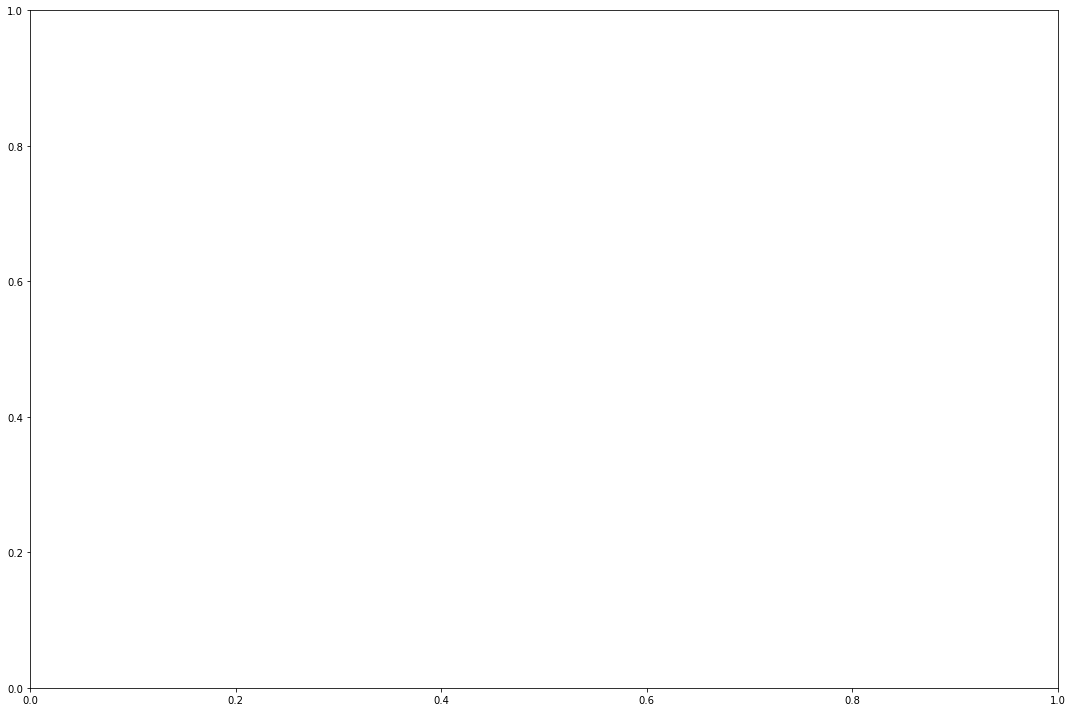

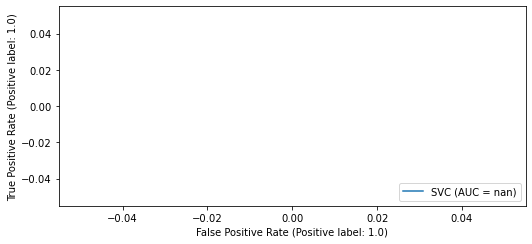

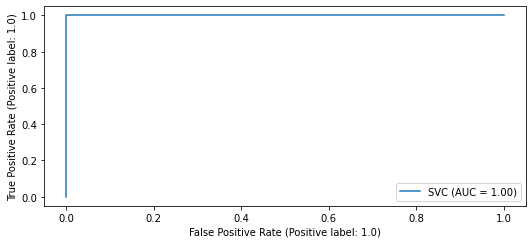

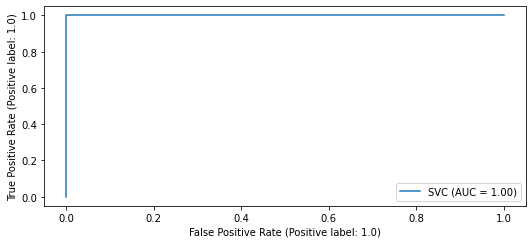

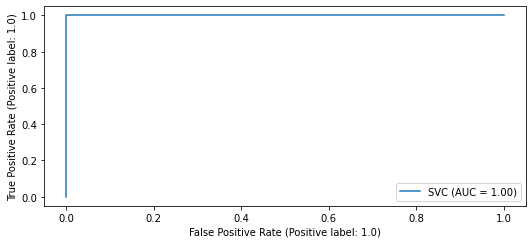

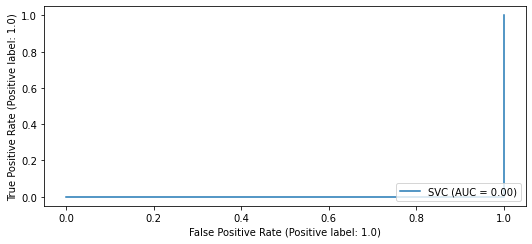

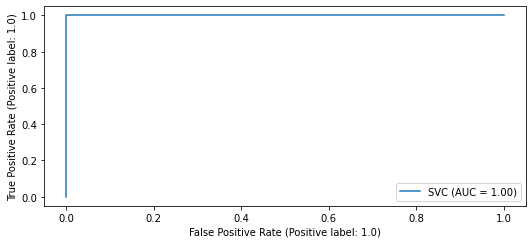

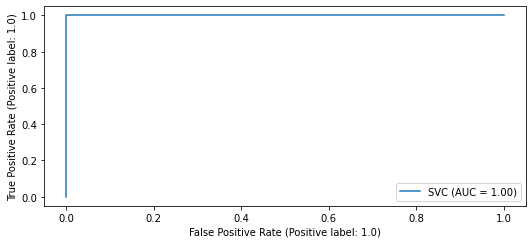

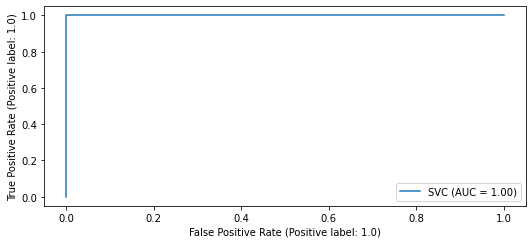

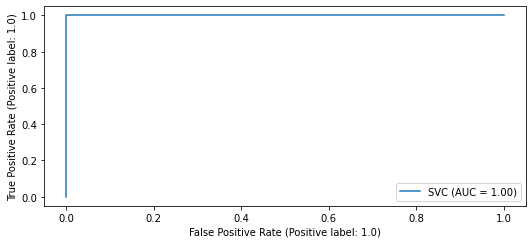

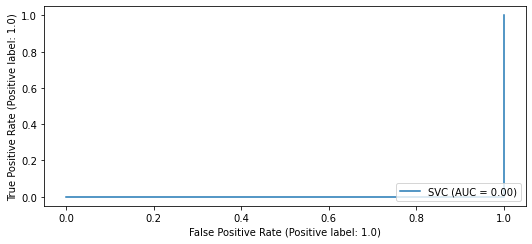

In [59]:
# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
classifier = SVC(kernel='rbf', probability=True, random_state=42)

tprs = []
aucs = []
y_test = []
y_pred_proba = []
mean_fpr = np.linspace(0, 1, 100)

X = X_pca
y = target

fig, ax = plt.subplots(figsize=(15,10))
for i, (train, test) in enumerate(cv.split(X, y)):
    
    print(f'FOLD {i+1} Test set')
    # print(y[test])
    
    classifier.fit(X[train], y[train])
    
    y_test.append(y[test].to_list()[0])
    y_test.append(y[test].to_list()[1])
    y_pred_proba.append(classifier.predict_proba(X[test]))
    
    RocCurveDisplay.from_estimator(classifier, X[test], y[test])
    
    print(f'y_test : {classifier.predict(X[test])} \n')
    print('------------------')
    

In [54]:
y_pred_proba = flatten_np(y_pred_proba)

In [55]:
roc_auc_score(y_test, y_pred_proba)

0.5555555555555556

In [56]:
y_test

[1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0]

In [57]:
y_pred_proba

[0.5148824281273919,
 0.4743908599137011,
 0.5972304168818723,
 0.5136984312002264,
 0.5412743792618527,
 0.44777357758324815,
 0.5643619021396604,
 0.5392110324187461,
 0.7886923613952092,
 0.8080408285118201,
 0.55519501318797,
 0.5525159892272515,
 0.5930282037122535,
 0.5100992001156034,
 0.7676449034846456,
 0.7534600932999602,
 0.5808364387073552,
 0.5359463732893436,
 0.38803341179814105,
 0.7101307934867624]

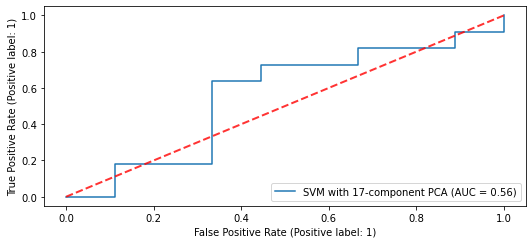

In [58]:
RocCurveDisplay.from_predictions(y_test, y_pred_proba, pos_label=1, name='SVM with 17-component PCA')
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)
plt.savefig('plot/roc_auc_pca_2.pdf')

AttributeError: coef_ is only available when using a linear kernel

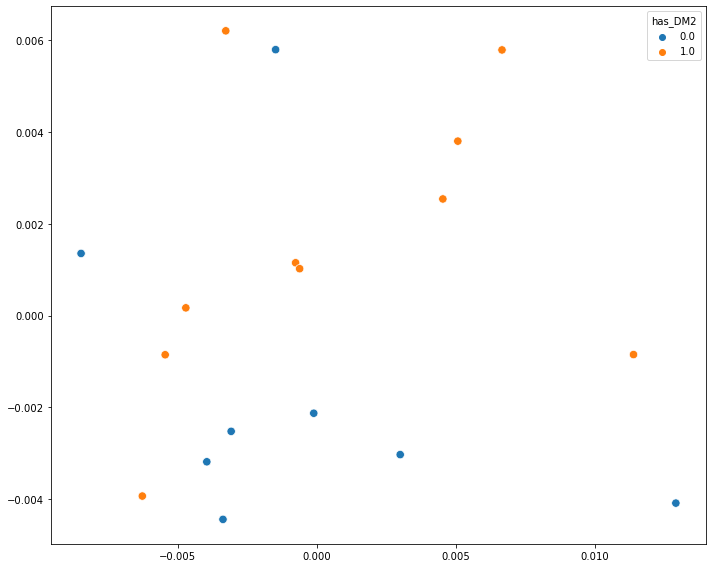

In [48]:
plt.figure(figsize=(10, 8))
# Plotting our two-features-space
sns.scatterplot(x=X_train[:, 0], 
                y=X_train[:, 1], 
                hue=y_train, 
                s=70);
# Constructing a hyperplane using a formula.
w = classifier.coef_[0]           # w consists of 2 elements
b = classifier.intercept_[0]      # b consists of 1 element
x_points = np.linspace(2, 5)    # generating x-points from -1 to 1
y_points = -(w[0] / w[1]) * x_points - b / w[1]  # getting corresponding y-points
# Plotting a red hyperplane
plt.plot(x_points, y_points, c='r');
plt.savefig('plot/svm_line.pdf')

              precision    recall  f1-score   support

         0.0       0.86      0.67      0.75         9
         1.0       0.77      0.91      0.83        11

    accuracy                           0.80        20
   macro avg       0.81      0.79      0.79        20
weighted avg       0.81      0.80      0.80        20



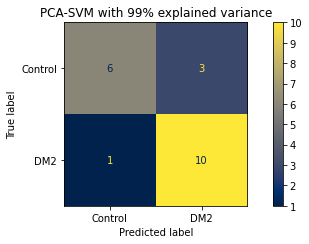

In [52]:
from sklearn.metrics import classification_report, plot_confusion_matrix

print(classification_report(target, classifier.predict(X_pca)))
plot_confusion_matrix(classifier, X_pca, target, display_labels=['Control', 'DM2'], cmap='cividis')
plt.title('PCA-SVM with 99% explained variance')
plt.savefig('pca_confusion_matrix.pdf')
plt.show()

In [40]:
for proba in best_svc.predict_proba(X_pca)[:, 1]:
    print('Obs : {0:.3f} %'.format(proba * 100))

Obs : 50.831 %
Obs : 50.833 %
Obs : 50.832 %
Obs : 50.834 %
Obs : 50.831 %
Obs : 50.833 %
Obs : 50.832 %
Obs : 50.830 %
Obs : 50.832 %
Obs : 50.833 %
Obs : 50.832 %
Obs : 50.834 %
Obs : 50.834 %
Obs : 50.832 %
Obs : 50.835 %
Obs : 50.834 %
Obs : 50.834 %
Obs : 50.830 %
Obs : 50.834 %
Obs : 50.834 %


In [224]:
interp_tpr

array([0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [305]:
for proba in best_svc.predict_proba(X_pca)[:, 1]:
    print('Obs : {0:.3f} %'.format(proba * 100))

Obs : 94.951 %
Obs : 93.697 %
Obs : 95.395 %
Obs : 93.598 %
Obs : 93.584 %
Obs : 85.578 %
Obs : 94.876 %
Obs : 93.630 %
Obs : 92.682 %
Obs : 94.581 %
Obs : 92.842 %
Obs : 8.086 %
Obs : 10.510 %
Obs : 9.495 %
Obs : 6.116 %
Obs : 4.701 %
Obs : 11.110 %
Obs : 10.119 %
Obs : 10.176 %
Obs : 14.576 %


In [ ]:
from sklearn.metrics import classification_report, plot_confusion_matrix

print(classification_report(target, classifier.predict(X_pca)))
plot_confusion_matrix(classifier, X_pca, target, display_labels=['Control', 'DM2'], cmap='cividis')
plt.title('PCA-SVM with 99% explained variance')
plt.savefig('pca_confusion_matrix.pdf')
plt.show()